In [31]:
# import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('creditcard.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# EDA

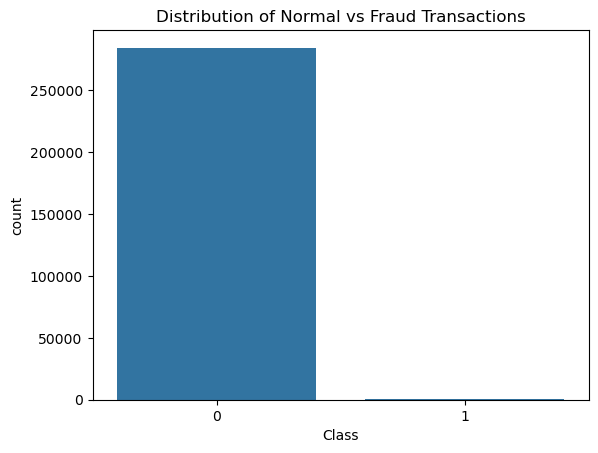

Number of normal transactions: 284315
Number of fraud transactions: 492


In [35]:
# Visualize the distribution of the target variable
sns.countplot(x='Class', data=df)
plt.title('Distribution of Normal vs Fraud Transactions')
plt.show()

print(f"Number of normal transactions: {len(df[df['Class'] == 0])}")
print(f"Number of fraud transactions: {len(df[df['Class'] == 1])}")

In [36]:
# top 5 features correlated with the fraud
features = [f'V{i}' for i in range(1,28)]
corr_with_target = df[features].corrwith(df['Class']).sort_values(key=abs, ascending=False)
print(corr_with_target)

top_features = corr_with_target.head(5).index.tolist()
print(f"Top 5 features that possibly correlated with fraud: {top_features}")

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V11    0.154876
V4     0.133447
V18   -0.111485
V1    -0.101347
V9    -0.097733
V5    -0.094974
V2     0.091289
V6    -0.043643
V21    0.040413
V19    0.034783
V20    0.020090
V8     0.019875
V27    0.017580
V24   -0.007221
V13   -0.004570
V26    0.004455
V15   -0.004223
V25    0.003308
V23   -0.002685
V22    0.000805
dtype: float64
Top 5 features that possibly correlated with fraud: ['V17', 'V14', 'V12', 'V10', 'V16']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

all_features = features + ['Amount', 'Time'] 
X = df[all_features]                           
y = df['Class']

m = RandomForestClassifier()
m.fit(X, y)

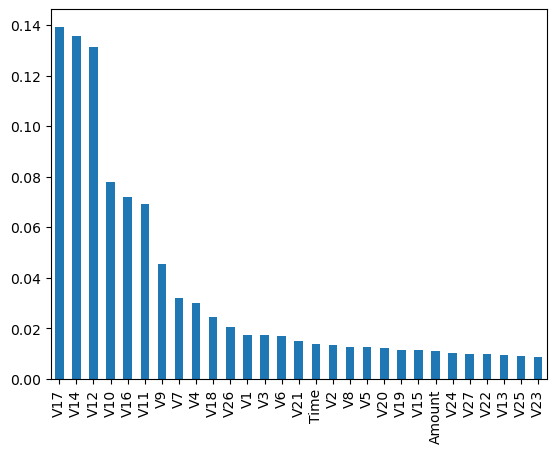

In [48]:
importances = pd.Series(m.feature_importances_, index=all_features)
importances.sort_values(ascending=False).plot(kind='bar')
plt.show()


In [50]:
# model preparation&training
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)